In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
file_path = "soc-Slashdot0902.txt"
data = pd.read_csv(file_path, sep="\t", skiprows=4, names=["FromNodeId", "ToNodeId"])


In [3]:
# Create a directed graph
G = nx.from_pandas_edgelist(data, source="FromNodeId", target="ToNodeId", create_using=nx.DiGraph)

In [4]:
# Compute basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 82168
Number of edges: 948464


In [5]:

# Compute degree distribution
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]


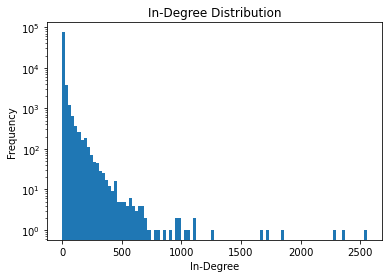

In [6]:

plt.hist(in_degrees, bins=100, log=True)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.show()


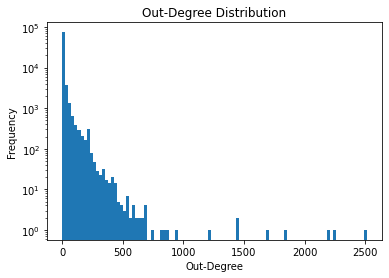

In [7]:

plt.hist(out_degrees, bins=100, log=True)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.show()


## Calculation of clustering coefficient
Execution load: upto 2 mins

In [8]:

# Compute average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering_coefficient}")



Average clustering coefficient: 0.05717480710273257


Execution load: upto 15 mins

In [9]:

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)


In [11]:
# Compute betweenness centrality (this may take a long time for large graphs)
#betweenness_centrality = nx.betweenness_centrality(G)

In [15]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

KeyboardInterrupt: 

In [14]:
# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:

# Find the top 5 nodes with the highest degree centrality
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"Top 5 nodes with highest degree centrality: {top_degree_centrality}")

# Find the top 5 nodes with the highest betweenness centrality
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"Top 5 nodes with highest betweenness centrality: {top_betweenness_centrality}")

# Find the top 5 nodes with the highest closeness centrality
top_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"Top 5 nodes with highest closeness centrality: {top_closeness_centrality}")

# Find the top 5 nodes with the highest eigenvector centrality
top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"Top 5 nodes with highest eigenvector centrality: {top_eigenvector_centrality}")


In [ ]:
# Find all non-existent edges (edges not in the graph)
non_edges = list(nx.non_edges(G_undirected))

# Compute Jaccard coefficient for all non-existent edges
jaccard_coefficient = list(nx.jaccard_coefficient(G_undirected, non_edges))

# Compute Adamic-Adar index for all non-existent edges
adamic_adar_index = list(nx.adamic_adar_index(G_undirected, non_edges))

# Sort edges by Jaccard coefficient
sorted_jaccard_coefficient = sorted(jaccard_coefficient, key=lambda x: x[2], reverse=True)

# Sort edges by Adamic-Adar index
sorted_adamic_adar_index = sorted(adamic_adar_index, key=lambda x: x[2], reverse=True)

# Find the top 5 edges with the highest Jaccard coefficient
top_jaccard_edges = [(edge[0], edge[1]) for edge in sorted_jaccard_coefficient[:5]]
print(f"Top 5 edges with highest Jaccard coefficient: {top_jaccard_edges}")

# Find the top 5 edges with the highest Adamic-Adar index
top_adamic_adar_edges = [(edge[0], edge[1]) for edge in sorted_adamic_adar_index[:5]]
print(f"Top 5 edges with highest Adamic-Adar index: {top_adamic_adar_edges}")

In [ ]:
import seaborn as sns

# Plot a heatmap of the adjacency matrix
adj_matrix = nx.adjacency_matrix(G_undirected)
sns.heatmap(adj_matrix.todense(), cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Heatmap of the Adjacency Matrix")
plt.show()

# Plot a histogram of the community sizes
community_sizes = pd.Series(list(partition.values())).value_counts()
plt.hist(community_sizes, bins=30, log=True)
plt.title("Community Sizes Distribution")
plt.xlabel("Community Size")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Compute Jaccard similarity for all non-existent edges
jaccard_similarity = list(nx.jaccard_coefficient(G_undirected, non_edges))

# Sort edges by Jaccard similarity
sorted_jaccard_similarity = sorted(jaccard_similarity, key=lambda x: x[2], reverse=True)

def recommend_friends(user, top_n=10):
    # Find potential friends for the given user
    potential_friends = [(edge[1], similarity) for edge, similarity in sorted_jaccard_similarity if edge[0] == user]
    
    # Return the top N recommendations
    return potential_friends[:top_n]

# Test the recommendation system for a specific user
user_id = 42  # Replace with desired user ID
top_n_recommendations = 10
recommended_friends = recommend_friends(user_id, top_n=top_n_recommendations)
print(f"Top {top_n_recommendations} friend recommendations for user {user_id}: {recommended_friends}")
